In [1]:
import pandas as pd
import numpy as np
import matplotlib. pyplot as plt
import seaborn as sns
df = pd.read_csv(r'C:\Users\debjo\Downloads\Customer Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [3]:
# Replace all blank spaces (" ") in the "TotalCharges" column with "0"
df["TotalCharges"] = df["TotalCharges"].replace(" ", "0")

# Convert the "TotalCharges" column from string type to float type
df["TotalCharges"] = df["TotalCharges"].astype("float")


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
# Check for missing (null) values in the entire DataFrame
# .isnull() returns a DataFrame of the same shape with True for missing values and False otherwise
# .sum() on a DataFrame counts the number of True values (i.e., nulls) in each column
# Another .sum() on the result adds up all the column-wise null counts to give the total number of missing values in the DataFrame
df.isnull().sum().sum()

0

In [15]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [6]:
# Check for duplicate values in the "customerID" column
# .duplicated() returns a Boolean Series: True for duplicate entries (except the first occurrence), False otherwise
# .sum() counts how many True values are in the Series, i.e., how many duplicate customer IDs exist
df["customerID"].duplicated().sum()

0

In [22]:
#converted 0 and 1 values of senior citizen to yes/no to make it easier to understand

In [7]:
# Define a function named 'conv' that takes a single argument 'value'
# If the value is 1, it returns the string "yes"
# Otherwise, it returns the string "no"
def conv(value):
    if value == 1:
        return "yes"
    else:
        return "no"

# Apply the 'conv' function to each element in the 'SeniorCitizen' column
# This converts values: 1 -> "yes", 0 -> "no"
# The result replaces the original values in the 'SeniorCitizen' column
df['SeniorCitizen'] = df["SeniorCitizen"].apply(conv)

In [23]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,no,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,no,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,no,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,no,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,no,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


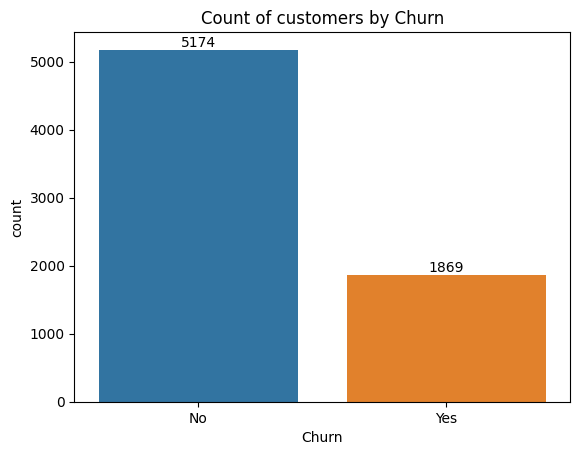

In [8]:
# Create a count plot (bar chart) showing the number of customers for each Churn category ('Yes' or 'No')
# 'x = "Churn"' specifies that the x-axis should represent the 'Churn' column
# 'data = df' tells seaborn to use the DataFrame 'df' for plotting
ax = sns.countplot(x='Churn', data=df)

# Add labels on top of each bar showing the count (i.e., number of customers)
# 'ax.containers[0]' accesses the first set of bars in the plot
ax.bar_label(ax.containers[0])

# Set the title of the plot
plt.title("Count of customers by Churn")

# Display the plot
plt.show()


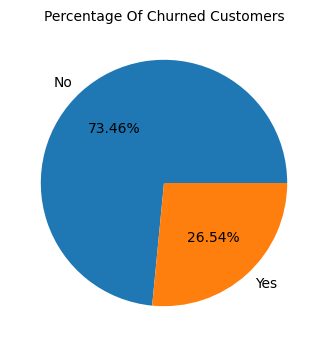

In [9]:
# Set the size of the figure to 4 inches by 4 inches
plt.figure(figsize=(4, 4))

# Group the DataFrame by the 'Churn' column and count the number of occurrences for each group
# This gives a summary count of customers who churned ('Yes') vs. those who didn't ('No')
gb = df.groupby("Churn").agg({'Churn': 'count'})

# Create a pie chart using the churn counts
# 'labels=gb.index' uses 'Yes' and 'No' as labels
# 'autopct="%1.2f%%"' formats the percentage values with 2 decimal places
plt.pie(gb['Churn'], labels=gb.index, autopct="%1.2f%%")

# Set the title of the pie chart with a font size of 10
plt.title("Percentage Of Churned Customers", fontsize=10)

# Display the pie chart
plt.show()

In [ ]:
#from the given pie chart we can conclude that 26.54% of our customers have churned out. #not let's explore the reasonbehind it

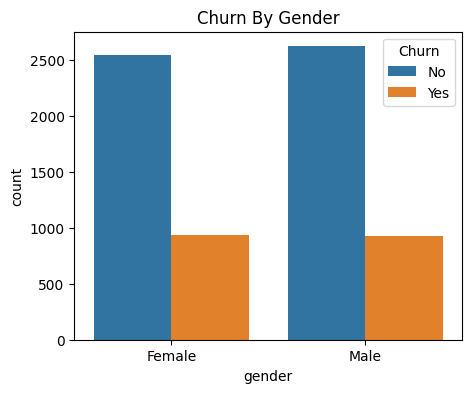

In [10]:
# Set the size of the figure to 5 inches wide and 4 inches tall
plt.figure(figsize=(5, 4))

# Create a count plot (bar chart) showing the number of customers by gender
# 'hue="Churn"' separates the bars by churn status (Yes/No) for each gender
# This helps visualize how churn varies across male and female customers
sns.countplot(x="gender", data=df, hue="Churn")

# Set the title of the plot
plt.title("Churn By Gender")

# Display the plot
plt.show()

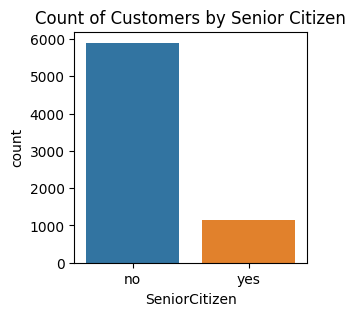

In [79]:
plt.figure(figsize=(3,3))  # Set figure size
sns.countplot(x="SeniorCitizen", data=df)  # Bar chart count of senior citizens
plt.title("Count of Customers by Senior Citizen")  # Title of the chart
plt.show()  # Display the plot

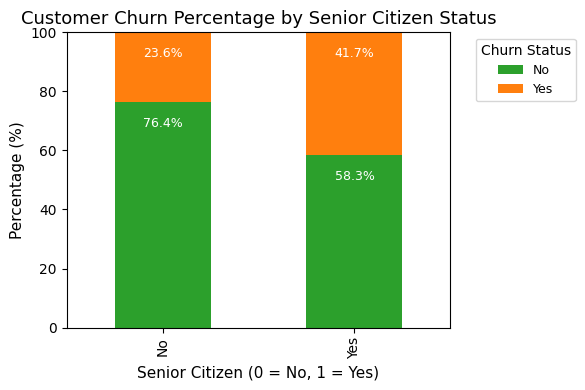

In [76]:
import pandas as pd
import matplotlib.pyplot as plt

# Group the data by SeniorCitizen and Churn, count the combinations
# Example output: 
#   Churn           No   Yes
#   SeniorCitizen            
#   0               1234  567
#   1                456  789
churn_counts = df.groupby(['SeniorCitizen', 'Churn']).size().unstack().fillna(0)

# Convert the counts to percentages row-wise
# This gives the % of customers who churned or didn't within each SeniorCitizen group
churn_percent = churn_counts.div(churn_counts.sum(axis=1), axis=0) * 100

# Sort the index so that 0 (Non-senior) appears before 1 (Senior)
churn_percent = churn_percent.sort_index()

# Define custom colors: Green for 'No Churn', Orange for 'Yes Churn'
colors = ['#2ca02c', '#ff7f0e']

# Plot a stacked bar chart using the percentage data
# - kind='bar': vertical bar chart
# - stacked=True: bars will be on top of each other, not side by side
# - figsize=(6, 4): width = 6, height = 4 inches
# - color=colors: apply our custom color list
ax = churn_percent.plot(kind='bar', stacked=True, figsize=(6, 4), color=colors)

# Add percentage labels inside the stacked bars
for i, index in enumerate(churn_percent.index):  # Loop over each bar (0 and 1)
    bottom = 0  # Start stacking from the bottom of the bar
    for churn_type in churn_percent.columns:  # Loop over 'No' and 'Yes' churn categories
        value = churn_percent.loc[index, churn_type]  # Get the percentage value
        if value > 0:
            # Place the percentage text slightly above the middle of each segment
            ax.text(i, bottom + value - 5,               # Position of text (x, y)
                    f'{value:.1f}%',                     # Format as one decimal %
                    ha='center',                         # Center horizontally
                    va='top',                            # Align text to top of segment
                    color='white',                       # White text for contrast
                    fontsize=9)                          # Font size
            bottom += value  # Add current segment height to bottom for next label

# Add title and axis labels with font size
plt.title('Customer Churn Percentage by Senior Citizen Status', fontsize=13)
plt.ylabel('Percentage (%)', fontsize=11)
plt.xlabel('Senior Citizen (0 = No, 1 = Yes)', fontsize=11)

# Set the y-axis range from 0% to 100%
plt.ylim(0, 100)

# Set custom x-tick labels: 0 becomes 'No', 1 becomes 'Yes'
plt.xticks([0, 1], ['No', 'Yes'], fontsize=10)
plt.yticks(fontsize=10)  # Set font size for y-axis ticks

# ✅ Fix legend position: move it outside the chart area to the right
# - bbox_to_anchor moves the legend to the right of the plot
# - loc='upper left' pins the top-left corner of the legend to that anchor point
# - title_fontsize sets the font size for the legend title
plt.legend(title='Churn Status', 
           bbox_to_anchor=(1.05, 1), 
           loc='upper left', 
           fontsize=9, 
           title_fontsize=10)

# Automatically adjusts plot layout to fit everything (especially legend)
plt.tight_layout()

# Finally, show the plot
plt.show()


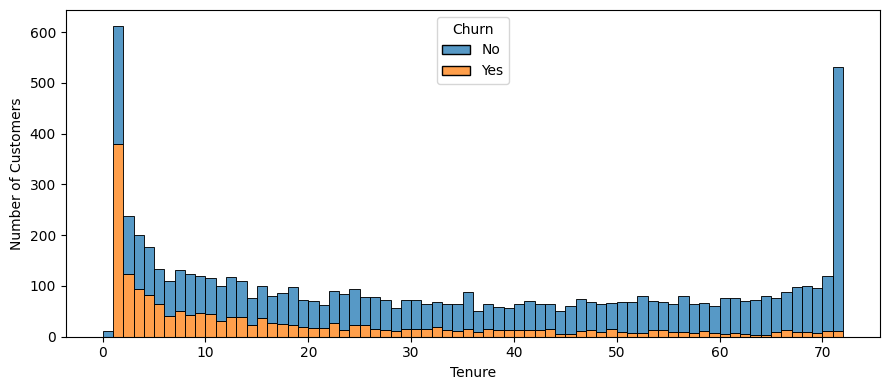

In [11]:
# Import the seaborn library for advanced data visualization
import seaborn as sns

# Import matplotlib for creating plots
import matplotlib.pyplot as plt

# Set the size of the figure (width=9 inches, height=4 inches)
plt.figure(figsize=(9, 4))

# Create a stacked histogram using seaborn's histplot
# - x="tenure": plot the 'tenure' column on the x-axis
# - data=df: use the DataFrame named df
# - bins=72: divide the tenure range into 72 bins (1 bin per month)
# - hue='Churn': color the bars by the 'Churn' column (Yes/No)
# - multiple='stack': stack the churn categories on top of each other
sns.histplot(x="tenure", data=df, bins=72, hue='Churn', multiple='stack')

# Set the label for the x-axis
plt.xlabel("Tenure")

# Set the label for the y-axis
plt.ylabel("Number of Customers")

# Automatically adjust spacing to prevent label overlap
plt.tight_layout()

# Display the plot
plt.show()

***people who have used our services for a long time have stayed and people who have used our sevices***

***1 or 2 months have churned***

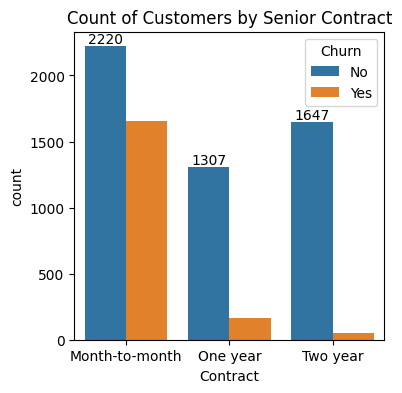

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(4,4))  # Set figure size
ax = sns.countplot(x="Contract", data=df,hue='Churn')  # Capture the Axes object in 'ax'
ax.bar_label(ax.containers[0])  # Add bar labels
plt.title("Count of Customers by Senior Contract")  # Title of the chart
plt.show()  # Display the plot


***people who have month to month contract are likely to churn then from those who have 1 or 2 years or contract***

df.columns.values

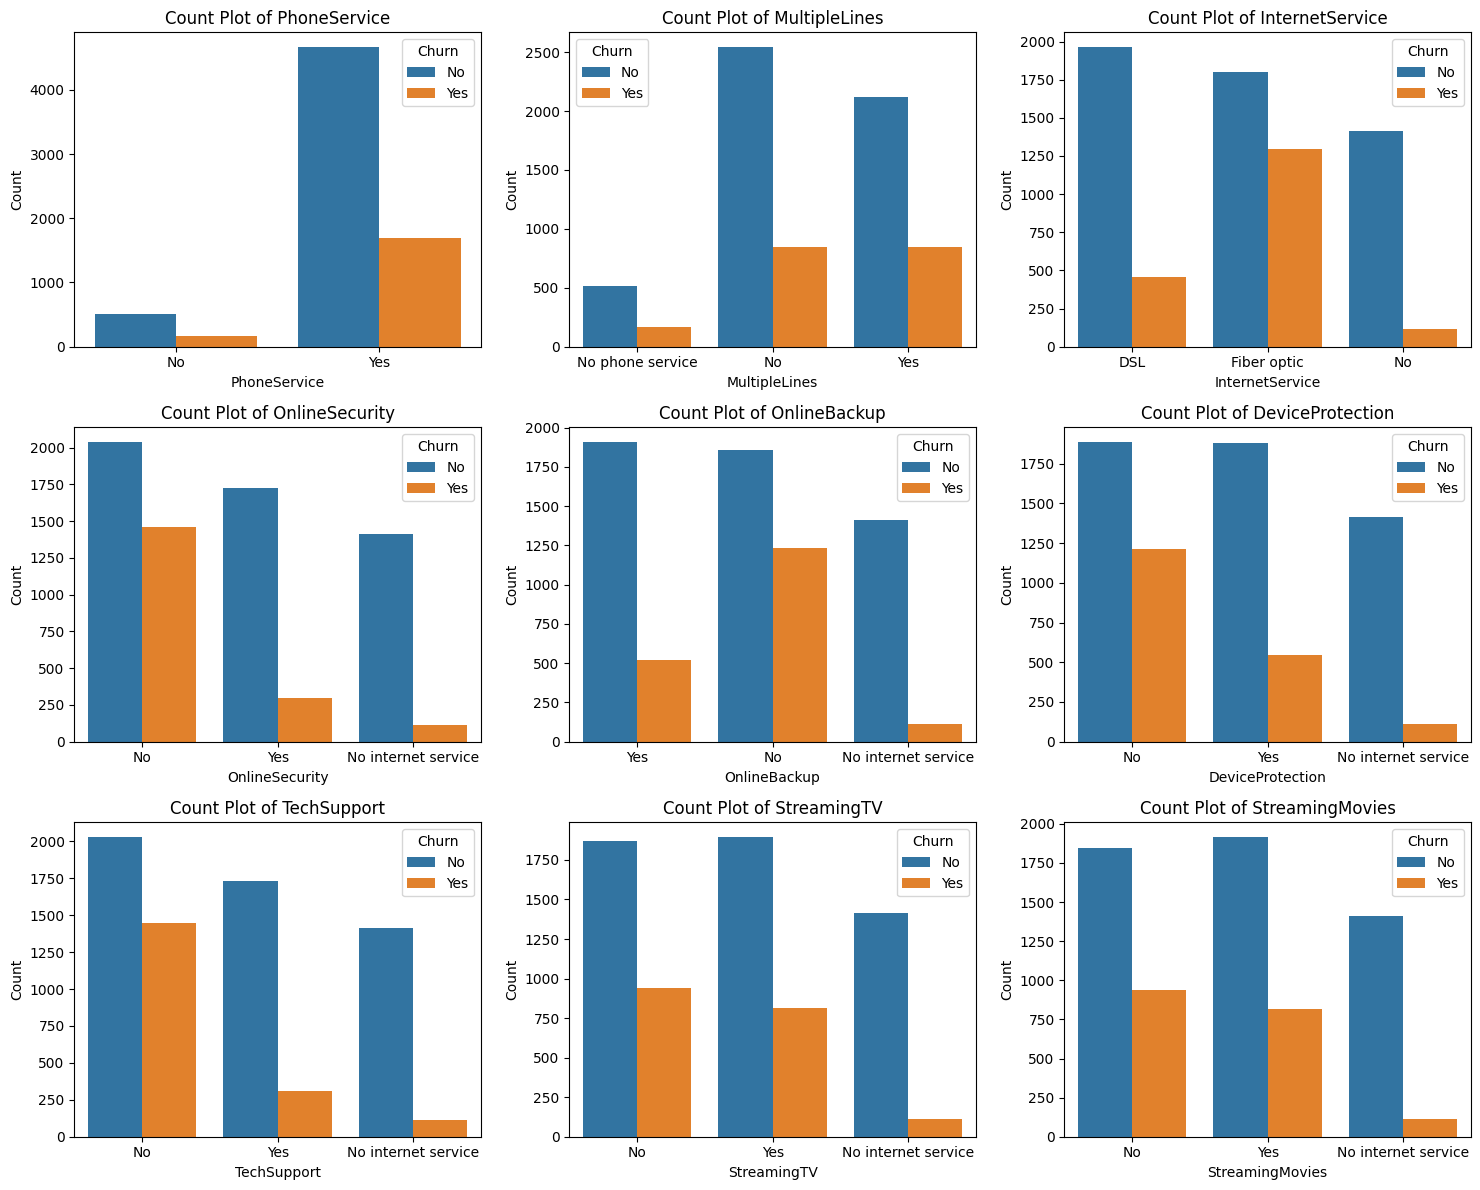

In [10]:
columns = ['PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 
           'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

# Number of columns for the subplot grid (you can change this)
n_cols = 3
n_rows = (len(columns) + n_cols - 1) // n_cols  # Calculate number of rows needed

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 4))  # Adjust figsize as needed

# Flatten the axes array for easy iteration (handles both 1D and 2D arrays)
axes = axes.flatten()

# Iterate over columns and plot count plots
for i, col in enumerate(columns):
    sns.countplot(x=col, data=df, ax=axes[i], hue = df["Churn"])
    axes[i].set_title(f'Count Plot of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')

# Remove empty subplots (if any)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

***The majority of customers who do not churn tend to have services like PhoneService, InternetService (particularly DSL), and OnlineSecurity enabled. For services like OnlineBackup, TechSupport, and StreamingTV, churn rates are noticeably higher when these services are not used or are unavailable***

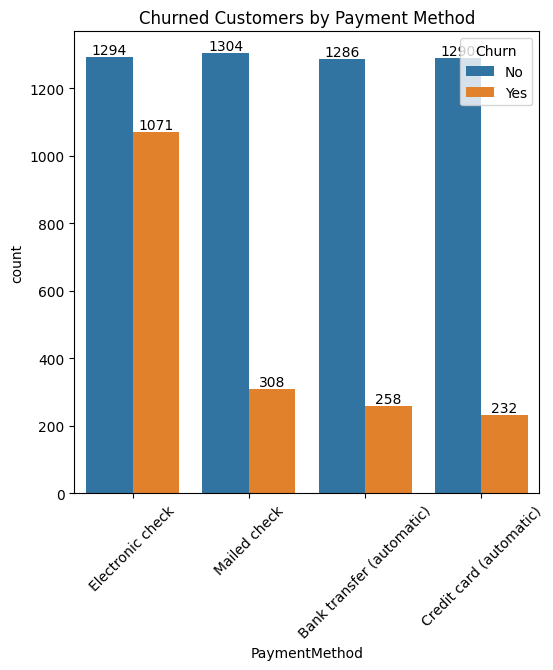

In [14]:
plt.figure(figsize = (6,6))
ax = sns.countplot(x = "PaymentMethod", data = df, hue = "Churn")
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.title("Churned Customers by Payment Method")
plt.xticks(rotation = 45)
plt.show()

***customer is likely to churn when he is using electronic check as a payment method***